In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np

from sklearn.datasets import make_moons, make_circles, make_classification # simulate
from sklearn.cross_validation import train_test_split

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
def plot_data(ax, X_train, y_train, X_test, y_test):
    color_map = ListedColormap(['#FF0000', '#0000FF'])
    ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=color_map, linewidths=0.6)
    ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=color_map, linewidths=0.6, alpha=0.6)

In [3]:
def splitData(X, y):
    return train_test_split(X, y, test_size=0.4)

In [4]:
def mesh_data_set(X):
    h = 0.2
    x0_min, x0_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x1_min, x1_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    x0x0, x1x1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))
    return x0x0, x1x1

Generate data

In [5]:
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
                           n_clusters_per_class=1, random_state=1)
X_train, X_test, y_train, y_test = splitData(X, y)

KNN

In [6]:
def plot(ax):
    # train & test
    knn = KNeighborsClassifier(3)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    
    # plot decision boundary
    x0x0, x1x1 = mesh_data_set(X)
    x0x1_pairs = np.c_[x0x0.ravel(), x1x1.ravel()]
    prob = knn.predict_proba(x0x1_pairs)[:, 1]
    prob = prob.reshape(x0x0.shape)
    color_map = plt.cm.RdYlBu
    ax.contourf(x0x0, x1x1, prob, cmap=color_map, alpha=0.8)
    
    # plot points
    plot_data(ax, X_train, y_train, X_test, y_test)
    
    ax.set_xticks(())
    ax.set_yticks(())

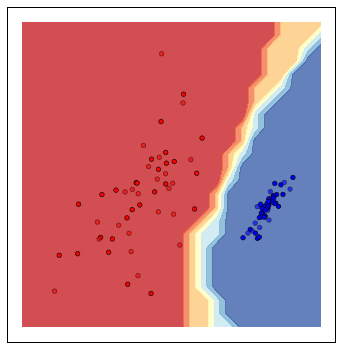

In [7]:
plt.figure(figsize=(20, 6))
ax = plt.subplot(1, 3, 1)
plot(ax)